# Trying to get a mouse Gene Ontology

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## I. Load files

In [2]:
go = pd.read_csv('go_terms.mgi', sep='\t', header=None, names=['category','GO_ID','term'])
go.head()

,category,GO_ID,term
0,Biological Process,GO:0000002,mitochondrial genome maintenance
1,Biological Process,GO:0000011,vacuole inheritance
2,Biological Process,GO:0000012,single strand break repair
3,Biological Process,GO:0000018,regulation of DNA recombination
4,Biological Process,GO:0000019,regulation of mitotic recombination


In [12]:
proteins = pd.read_csv('gp2protein.mgi', sep='\t', header=None, names=['MGI','identifier'])
proteins.head()

,MGI,identifier
0,MGI:MGI:2668412,UniProtKB:Q7TQP3
1,MGI:MGI:1914111,UniProtKB:Q9DC23
2,MGI:MGI:105125,UniProtKB:P48024
3,MGI:MGI:2441662,VEGA:OTTMUSP00000017525
4,MGI:MGI:95817,UniProtKB:Q8BMF5


In [22]:
ontology = pd.read_csv('gene_association.mgi', sep='\t', skiprows=24, header=None, names=["DB", "DB Object ID", "DB Object Symbol", "Qualifier", "GO ID", "DB:Reference(s)", "Evidence Code", "With (or)From", "Aspect (GO DAG Abbreviation (F, P, C))", "DB Object Name", "DB Object Synonym(s)", "DB Object Type", "Taxon", "Date", "Assigned By", "Annotation Extension", "Gene Product Form ID"])
ontology.head()

,DB,DB Object ID,DB Object Symbol,Qualifier,GO ID,DB:Reference(s),Evidence Code,With (or)From,"Aspect (GO DAG Abbreviation (F, P, C))",DB Object Name,DB Object Synonym(s),DB Object Type,Taxon,Date,Assigned By,Annotation Extension,Gene Product Form ID
0,MGI,MGI:1918911,0610005C13Rik,NaN,GO:0003674,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,F,RIKEN cDNA 0610005C13 gene,NaN,gene,taxon:10090,20100209,MGI,NaN,NaN
1,MGI,MGI:1918911,0610005C13Rik,NaN,GO:0005575,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,C,RIKEN cDNA 0610005C13 gene,NaN,gene,taxon:10090,20100209,MGI,NaN,NaN
2,MGI,MGI:1918911,0610005C13Rik,NaN,GO:0008150,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,P,RIKEN cDNA 0610005C13 gene,NaN,gene,taxon:10090,20100209,MGI,NaN,NaN
3,MGI,MGI:1923503,0610006L08Rik,NaN,GO:0003674,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,F,RIKEN cDNA 0610006L08 gene,NaN,gene,taxon:10090,20120430,MGI,NaN,NaN
4,MGI,MGI:1923503,0610006L08Rik,NaN,GO:0005575,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,C,RIKEN cDNA 0610006L08 gene,NaN,gene,taxon:10090,20120430,MGI,NaN,NaN


In [23]:
ontology[ontology.DB != 'MGI']

,DB,DB Object ID,DB Object Symbol,Qualifier,GO ID,DB:Reference(s),Evidence Code,With (or)From,"Aspect (GO DAG Abbreviation (F, P, C))",DB Object Name,DB Object Synonym(s),DB Object Type,Taxon,Date,Assigned By,Annotation Extension,Gene Product Form ID


## II. Map proteins from MGI identifiers to what they provide instead

In [26]:
ontology['gene'] = ontology['DB'].map(str) + ":" + ontology['DB Object ID']
del ontology['DB'], ontology['DB Object ID']
ontology.head()

,DB Object Symbol,Qualifier,GO ID,DB:Reference(s),Evidence Code,With (or)From,"Aspect (GO DAG Abbreviation (F, P, C))",DB Object Name,DB Object Synonym(s),DB Object Type,Taxon,Date,Assigned By,Annotation Extension,Gene Product Form ID,gene
0,0610005C13Rik,NaN,GO:0003674,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,F,RIKEN cDNA 0610005C13 gene,NaN,gene,taxon:10090,20100209,MGI,NaN,NaN,MGI:MGI:1918911
1,0610005C13Rik,NaN,GO:0005575,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,C,RIKEN cDNA 0610005C13 gene,NaN,gene,taxon:10090,20100209,MGI,NaN,NaN,MGI:MGI:1918911
2,0610005C13Rik,NaN,GO:0008150,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,P,RIKEN cDNA 0610005C13 gene,NaN,gene,taxon:10090,20100209,MGI,NaN,NaN,MGI:MGI:1918911
3,0610006L08Rik,NaN,GO:0003674,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,F,RIKEN cDNA 0610006L08 gene,NaN,gene,taxon:10090,20120430,MGI,NaN,NaN,MGI:MGI:1923503
4,0610006L08Rik,NaN,GO:0005575,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,C,RIKEN cDNA 0610006L08 gene,NaN,gene,taxon:10090,20120430,MGI,NaN,NaN,MGI:MGI:1923503


In [27]:
ontology.columns

Index(['DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference(s)',
       'Evidence Code', 'With (or)From',
       'Aspect (GO DAG Abbreviation (F, P, C))', 'DB Object Name',
       'DB Object Synonym(s)', 'DB Object Type', 'Taxon', 'Date',
       'Assigned By', 'Annotation Extension', 'Gene Product Form ID', 'gene'],
      dtype='object')

In [34]:
set(ontology.Taxon)

{'taxon:10090'}

In [35]:
del ontology['Taxon']

In [31]:
set(ontology.Qualifier)

{'NOT',
 'NOT|colocalizes_with',
 'NOT|contributes_to',
 'colocalizes_with',
 'contributes_to',
 nan}

In [37]:
ontology = ontology[~ontology.Qualifier.isin(['NOT', 'NOT|colocalizes_with', 'NOT|contributes_to'])]
ontology.head()

,DB Object Symbol,Qualifier,GO ID,DB:Reference(s),Evidence Code,With (or)From,"Aspect (GO DAG Abbreviation (F, P, C))",DB Object Name,DB Object Synonym(s),DB Object Type,Date,Assigned By,Annotation Extension,Gene Product Form ID,gene
0,0610005C13Rik,NaN,GO:0003674,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,F,RIKEN cDNA 0610005C13 gene,NaN,gene,20100209,MGI,NaN,NaN,MGI:MGI:1918911
1,0610005C13Rik,NaN,GO:0005575,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,C,RIKEN cDNA 0610005C13 gene,NaN,gene,20100209,MGI,NaN,NaN,MGI:MGI:1918911
2,0610005C13Rik,NaN,GO:0008150,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,P,RIKEN cDNA 0610005C13 gene,NaN,gene,20100209,MGI,NaN,NaN,MGI:MGI:1918911
3,0610006L08Rik,NaN,GO:0003674,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,F,RIKEN cDNA 0610006L08 gene,NaN,gene,20120430,MGI,NaN,NaN,MGI:MGI:1923503
4,0610006L08Rik,NaN,GO:0005575,MGI:MGI:2156816|GO_REF:0000015,ND,NaN,C,RIKEN cDNA 0610006L08 gene,NaN,gene,20120430,MGI,NaN,NaN,MGI:MGI:1923503


In [38]:
set(ontology.Qualifier)

{'colocalizes_with', 'contributes_to', nan}

In [39]:
del ontology['Qualifier']

In [44]:
ontology = ontology[['gene','GO ID','Evidence Code','DB Object Type']]
ontology.head()

,gene,GO ID,Evidence Code,DB Object Type
0,MGI:MGI:1918911,GO:0003674,ND,gene
1,MGI:MGI:1918911,GO:0005575,ND,gene
2,MGI:MGI:1918911,GO:0008150,ND,gene
3,MGI:MGI:1923503,GO:0003674,ND,gene
4,MGI:MGI:1923503,GO:0005575,ND,gene


In [45]:
len(set(ontology.gene)), len(set(proteins.MGI))

(24537, 22454)

In [47]:
ontology = ontology.merge(proteins, how='left', left_on='gene', right_on='MGI')
ontology.head(15)

,gene,GO ID,Evidence Code,DB Object Type,MGI,identifier
0,MGI:MGI:1918911,GO:0003674,ND,gene,NaN,NaN
1,MGI:MGI:1918911,GO:0005575,ND,gene,NaN,NaN
2,MGI:MGI:1918911,GO:0008150,ND,gene,NaN,NaN
3,MGI:MGI:1923503,GO:0003674,ND,gene,NaN,NaN
4,MGI:MGI:1923503,GO:0005575,ND,gene,NaN,NaN
5,MGI:MGI:1923503,GO:0008150,ND,gene,NaN,NaN
6,MGI:MGI:1913300,GO:0003674,ND,protein,MGI:MGI:1913300,VEGA:OTTMUSP00000005776
7,MGI:MGI:1913300,GO:0005575,ND,protein,MGI:MGI:1913300,VEGA:OTTMUSP00000005776
8,MGI:MGI:1913300,GO:0008150,ND,protein,MGI:MGI:1913300,VEGA:OTTMUSP00000005776
9,MGI:MGI:3698435,GO:0003674,ND,gene,NaN,NaN


In [53]:
len(ontology[ontology.identifier.notnull()]) / len(ontology)

0.968015466812136

## III. Get MyGene's opinion

In [72]:
ontology['gene'] = ontology['gene'].str.split(':',1).str[1]
ontology.head()

,gene,GO ID,Evidence Code,DB Object Type,MGI,identifier
0,MGI:1918911,GO:0003674,ND,gene,NaN,NaN
1,MGI:1918911,GO:0005575,ND,gene,NaN,NaN
2,MGI:1918911,GO:0008150,ND,gene,NaN,NaN
3,MGI:1923503,GO:0003674,ND,gene,NaN,NaN
4,MGI:1923503,GO:0005575,ND,gene,NaN,NaN


In [73]:
import mygene
mg = mygene.MyGeneInfo()
results = mg.querymany(list(set(ontology.gene.tolist())), scopes=['mgi'], fields=["symbol"], species="mouse", as_dataframe=True, returnall=True)
duplicated = results['dup']
missing = results['missing']
out = results['out']

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-24537...done.
Finished.
303 input query terms found no hit:
	['MGI:3779366', 'MGI:3588248', 'MGI:3779332', 'MGI:1890572', 'MGI:3651929', 'MGI:3578139', 'MGI:5434


In [77]:
ontology = ontology.merge(out.symbol.to_frame(), how='left', left_on='gene', right_index=True)
ontology.head()

,gene,GO ID,Evidence Code,DB Object Type,MGI,identifier,symbol
0,MGI:1918911,GO:0003674,ND,gene,NaN,NaN,0610005C13Rik
1,MGI:1918911,GO:0005575,ND,gene,NaN,NaN,0610005C13Rik
2,MGI:1918911,GO:0008150,ND,gene,NaN,NaN,0610005C13Rik
3,MGI:1923503,GO:0003674,ND,gene,NaN,NaN,0610006L08Rik
4,MGI:1923503,GO:0005575,ND,gene,NaN,NaN,0610006L08Rik


In [80]:
sum(~ontology.symbol.isnull()), sum(ontology.symbol.isnull())

(373080, 882)

In [83]:
len(ontology[ontology.symbol.isnull() & ontology.identifier.notnull()])

418

In [85]:
ontology.to_pickle('save_progress.pickle')

## IV. Trust MyGene

In [3]:
ontology = pd.read_pickle('save_progress.pickle')
ontology.head()

,gene,GO ID,Evidence Code,DB Object Type,MGI,identifier,symbol
0,MGI:1918911,GO:0003674,ND,gene,NaN,NaN,0610005C13Rik
1,MGI:1918911,GO:0005575,ND,gene,NaN,NaN,0610005C13Rik
2,MGI:1918911,GO:0008150,ND,gene,NaN,NaN,0610005C13Rik
3,MGI:1923503,GO:0003674,ND,gene,NaN,NaN,0610006L08Rik
4,MGI:1923503,GO:0005575,ND,gene,NaN,NaN,0610006L08Rik


In [4]:
ontology = ontology[~ontology.symbol.isnull()][['symbol','GO ID', 'Evidence Code', 'DB Object Type']]
ontology.head()

,symbol,GO ID,Evidence Code,DB Object Type
0,0610005C13Rik,GO:0003674,ND,gene
1,0610005C13Rik,GO:0005575,ND,gene
2,0610005C13Rik,GO:0008150,ND,gene
3,0610006L08Rik,GO:0003674,ND,gene
4,0610006L08Rik,GO:0005575,ND,gene


## V. Organize Final DF

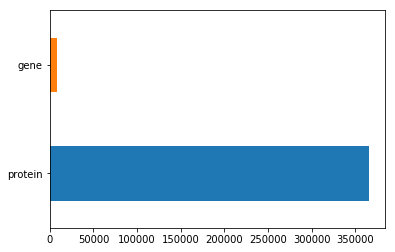

In [5]:
ontology['DB Object Type'].value_counts().plot.barh()

In [6]:
del ontology['DB Object Type']

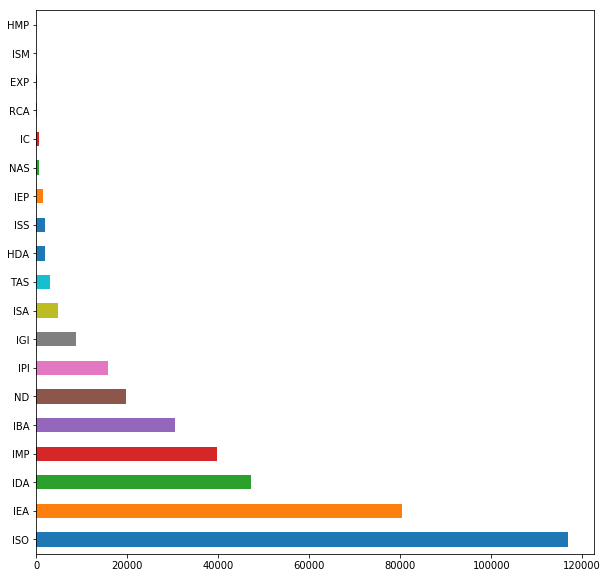

In [7]:
ontology['Evidence Code'].value_counts().plot.barh(figsize=(10,10))

### ISO and IEA are low quality codes, but I'm not sure we have a choice but to keep them. 

In [10]:
ontology = ontology.merge(go, how='left', left_on='GO ID', right_on='GO_ID')
ontology.head()

,symbol,GO ID,Evidence Code,category,GO_ID,term
0,0610005C13Rik,GO:0003674,ND,Molecular Function,GO:0003674,molecular_function
1,0610005C13Rik,GO:0005575,ND,Cellular Component,GO:0005575,cellular_component
2,0610005C13Rik,GO:0008150,ND,Biological Process,GO:0008150,biological_process
3,0610006L08Rik,GO:0003674,ND,Molecular Function,GO:0003674,molecular_function
4,0610006L08Rik,GO:0005575,ND,Cellular Component,GO:0005575,cellular_component


In [12]:
len(ontology[ontology['GO_ID'].isnull()])

57

In [13]:
set(ontology[ontology['GO_ID'].isnull()]['GO ID'])

{'GO:0001300',
 'GO:0003259',
 'GO:0021539',
 'GO:0021548',
 'GO:0021723',
 'GO:0031392',
 'GO:0035502',
 'GO:0035634',
 'GO:0039003',
 'GO:0044345',
 'GO:0060675',
 'GO:0071240',
 'GO:0072047',
 'GO:0072070',
 'GO:0072086',
 'GO:0072087',
 'GO:0072141',
 'GO:0072198',
 'GO:0072220',
 'GO:0072223',
 'GO:0072230',
 'GO:0072232',
 'GO:0072264',
 'GO:0072272',
 'GO:0072278',
 'GO:0072283',
 'GO:0072286',
 'GO:0099178'}

### These are valid GO terms, but I'm too lazy to fix this right now

In [14]:
ontology = ontology[~ontology['GO_ID'].isnull()]
len(ontology)

373023

In [15]:
ontology['tax_id'] = 10090
ontology.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,symbol,GO ID,Evidence Code,category,GO_ID,term,tax_id
0,0610005C13Rik,GO:0003674,ND,Molecular Function,GO:0003674,molecular_function,10090
1,0610005C13Rik,GO:0005575,ND,Cellular Component,GO:0005575,cellular_component,10090
2,0610005C13Rik,GO:0008150,ND,Biological Process,GO:0008150,biological_process,10090
3,0610006L08Rik,GO:0003674,ND,Molecular Function,GO:0003674,molecular_function,10090
4,0610006L08Rik,GO:0005575,ND,Cellular Component,GO:0005575,cellular_component,10090


In [16]:
del ontology['GO ID']

In [17]:
ontology = ontology.rename(columns={'symbol':'GeneSymbol','Evidence Code':'Evidence', 'term':'GO_term', 'category':'Category'})
ontology = ontology[['tax_id','GeneSymbol', 'GO_ID', 'Evidence', 'GO_term', 'Category']]
ontology.head()

,tax_id,GeneSymbol,GO_ID,Evidence,GO_term,Category
0,10090,0610005C13Rik,GO:0003674,ND,molecular_function,Molecular Function
1,10090,0610005C13Rik,GO:0005575,ND,cellular_component,Cellular Component
2,10090,0610005C13Rik,GO:0008150,ND,biological_process,Biological Process
3,10090,0610006L08Rik,GO:0003674,ND,molecular_function,Molecular Function
4,10090,0610006L08Rik,GO:0005575,ND,cellular_component,Cellular Component


In [18]:
ontology['Category'] = ontology['Category'].str.split(' ').str[1]
ontology.head()

,tax_id,GeneSymbol,GO_ID,Evidence,GO_term,Category
0,10090,0610005C13Rik,GO:0003674,ND,molecular_function,Function
1,10090,0610005C13Rik,GO:0005575,ND,cellular_component,Component
2,10090,0610005C13Rik,GO:0008150,ND,biological_process,Process
3,10090,0610006L08Rik,GO:0003674,ND,molecular_function,Function
4,10090,0610006L08Rik,GO:0005575,ND,cellular_component,Component


In [19]:
ontology.to_csv('mouse2go.csv', header=True, index=False)